@ Author Mohammed Topiwalla
* Date 15/03/2018
* *Machine learning exam submission*
* *Student ID-> 0000854104*
#### Machine Learning SVM and ANN Assignment
> This notebook is an extension of the original notebook discussed by the professor at college.
> The notebook includes classification for lasagna,Ragu,Carbonara and gnochi types of pasta.

##### The notebook is structured in the following way
* Load all basic packages that would be used
* Define directories and plot a single image for each type of pasta
* Break down the image into pixel values and apply appropriate transformations
* Begin the classification with SVM
* Check for most apt C values in svm, make the final model, see the accuracy and assess the model
* Begin with the process of data transformation for ANN
* Define ANN model , check accuracy and assess the model
* Try a dropout model in ann
* Perform transformations on original data for histogram of gradients
* Check if it is able to boost accuracy of the model
* Conclusions

###### Note-
* *The notebook is a pure python 3.0 notebook breed*
* *It is important to note that none of the python2 scripts provided in the tutorial have been used, this is a standalone jupter notebook*
* *Tensorflow is used at the back*
* *HOG (Histogram of gradient method used based on the sklearn package and a colour image was transformed to grayscale thanks to cv2)*


In [1]:
import warnings
warnings.filterwarnings('ignore')
import os
import numpy as np
import time
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from sklearn.metrics import cohen_kappa_score
import pandas as pd
import seaborn as sns
import matplotlib.image as img
from skimage.transform import resize
from sklearn import svm
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, precision_score
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
print("=================== Packages Loaded ===================")


Using TensorFlow backend.


=================== Packages Loaded ===================


C:\Users\moham\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


=================== Loading Data ===================
Image 1 : Ragu 	 2:Carbonara 	 3:Lasagna 	 4:gnocchi


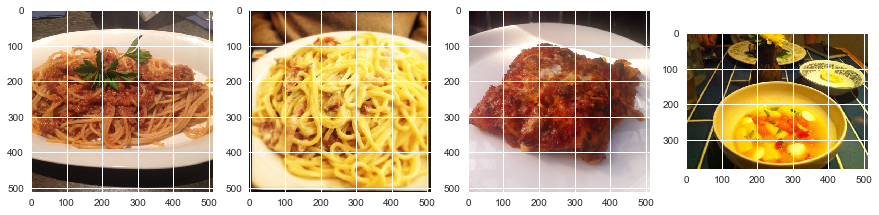

In [2]:
print("=================== Loading Data ===================")
root_dir = 'food/'
ragu_dir = 'spaghetti_bolognese/'
carbonara_dir = 'spaghetti_carbonara/'
lasagna_dir = 'lasagna/'
gnocchi_dir = 'gnocchi/'

all_ragu = os.listdir(os.path.join(root_dir, ragu_dir))
all_carbonara = os.listdir(os.path.join(root_dir, carbonara_dir))
all_lasagna = os.listdir(os.path.join(root_dir, lasagna_dir))
all_gnocchi = os.listdir(os.path.join(root_dir, gnocchi_dir))

print("Image 1 : Ragu \t 2:Carbonara \t 3:Lasagna \t 4:gnocchi")
fig, ax = plt.subplots(1,4, frameon=False, figsize=(15, 20))
rand_img = np.random.choice(all_ragu)
img = plt.imread(os.path.join(root_dir, ragu_dir, rand_img))
ax[0].imshow(img)

rand_img = np.random.choice(all_carbonara)
img = plt.imread(os.path.join(root_dir, carbonara_dir, rand_img))
ax[1].imshow(img)

rand_img = np.random.choice(all_lasagna)
img = plt.imread(os.path.join(root_dir, lasagna_dir, rand_img))
ax[2].imshow(img)

rand_img = np.random.choice(all_gnocchi)
img = plt.imread(os.path.join(root_dir, gnocchi_dir, rand_img))
ax[3].imshow(img)

plt.show()

In [61]:
start_time = time.time()
print("=================== Transforming images to Matrices ===================")
import matplotlib.image as img

target_w = 65
target_h = 65
all_imgs_orig = []
all_imgs = []
all_labels = []
idx = 0    
min_side = 400
resize_count = 0

for img_name in all_ragu:
    img_arr = img.imread(os.path.join(root_dir, ragu_dir, img_name))
    w,h,d = img_arr.shape
    img_arr_rs = img_arr
    img_arr_rs = resize(img_arr, (target_w, target_h))
    all_imgs.append(img_arr_rs)
    all_imgs_orig.append(img_arr)
    all_labels.append(0)
print("=================== Raggu Loaded ===================")

for img_name in all_carbonara:
    img_arr = img.imread(os.path.join(root_dir, carbonara_dir, img_name))
    w,h,d = img_arr.shape
    img_arr_rs = img_arr
    img_arr_rs = resize(img_arr, (target_w, target_h))
    all_imgs.append(img_arr_rs)
    all_imgs_orig.append(img_arr)
    all_labels.append(1)
print("=================== Carbonara Loaded ===================")

for img_name in all_lasagna:
    img_arr = img.imread(os.path.join(root_dir, lasagna_dir, img_name))
    w,h,d = img_arr.shape
    img_arr_rs = img_arr
    img_arr_rs = resize(img_arr, (target_w, target_h))
    all_imgs.append(img_arr_rs)
    all_imgs_orig.append(img_arr)
    all_labels.append(2)
print("=================== Lasagna Loaded ===================")

for img_name in all_gnocchi:
    img_arr = img.imread(os.path.join(root_dir,gnocchi_dir, img_name))
    w,h,d = img_arr.shape
    img_arr_rs = img_arr
    img_arr_rs = resize(img_arr, (target_w, target_h))
    all_imgs.append(img_arr_rs)
    all_imgs_orig.append(img_arr)
    all_labels.append(3)
print("=================== Gnnochi Loaded ===================")
print("Duration: --- %s Minutes ---" % ((time.time() - start_time)/60))

=================== Transforming images to Matrices ===================
=================== Raggu Loaded ===================
=================== Carbonara Loaded ===================
=================== Lasagna Loaded ===================
=================== Gnnochi Loaded ===================
Duration: --- 2.810639214515686 Minutes ---


In [9]:
print("Gnochi size:"+str(len(all_gnocchi)))
print("Lasagna size:"+str(len(all_lasagna)))
print("Ragu size:"+str(len(all_ragu)))
print("Carbonara size:"+str(len(all_carbonara)))

Gnochi size:1000
Lasagna size:999
Ragu size:1000
Carbonara size:1000


##### While loading data if we check lasagna has 999 images that is because its file had one ambigous image which was removed! The image is this-

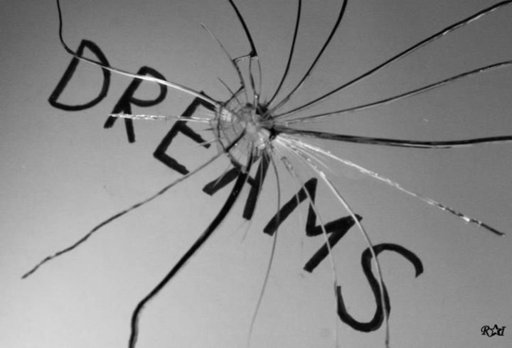

In [62]:
print("=================== Defining Test and Train Values ===================")
print("=================== Split of 50:25:25 ===================")
X = np.array(all_imgs)
Y = all_labels
#Y = Y[:,0]

n,w,l,d = X.shape
X_raw = np.reshape(X,(n,w*l*d))

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_raw)

x, x_test, y, y_test = train_test_split(X_scaled, Y, test_size=0.25, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.333, random_state=42)
print("For Main Data Set :",len(all_imgs))
print("For Train Set :",len(x_train))
print("For Validation Set :",len(x_val))
print("For Test Set :",len(x_test))

=================== Defining Test and Train Values ===================
=================== Split of 50:25:25 ===================
For Main Data Set : 3999
For Train Set : 2000
For Validation Set : 999
For Test Set : 1000


In [8]:
print('Training data shape : ', x_train.shape,len(y_train))
print('Validation data shape : ', x_val.shape,len(y_val))
print('Testing data shape : ', x_test.shape,len(y_test))

Training data shape :  (2000, 12675) 2000
Validation data shape :  (999, 12675) 999
Testing data shape :  (1000, 12675) 1000


In [52]:
classes = np.unique(y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  4
Output classes :  [0 1 2 3]


Ok ! Perfect so now we have transformed our data set brought it in a numpy array shape and most importantly defined our train and test set

##### Here essentially I am running multiple SVM's for classification to find optimal c Value
*I am using the validation data set here to find optimal c value*
> Lower C value leads to more flexiblity and leads to higher training error
>
> Higher C value leads to less flexibility and leads to lower training error

Acc Train: 0.970500, Acc Test:0.393393
Acc Train: 1.000000, Acc Test:0.369369
Acc Train: 1.000000, Acc Test:0.369369


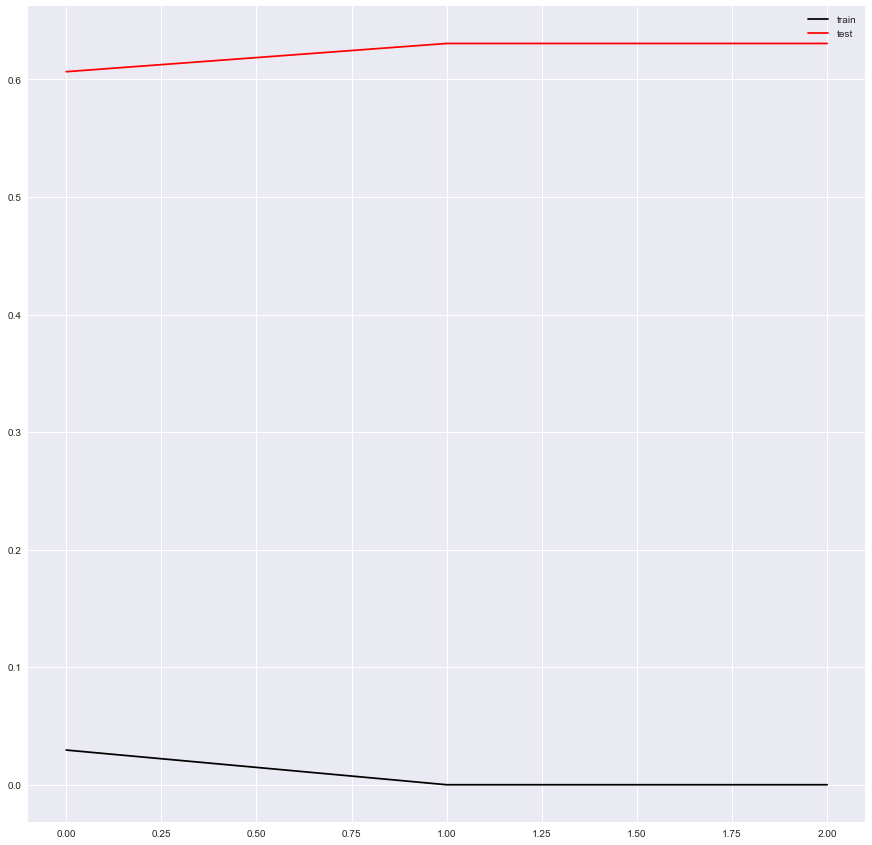

Duration: --- 14.0785848736763 Minutes ---


In [53]:
start_time = time.time()
C_values = [0.001,1.0,100.0]
prediction_error = []
train_error = []

for C_val in C_values:
    clf = svm.SVC(kernel='linear', C=C_val)
    clf.fit(x_train, y_train)
    score_train = clf.score(x_train, y_train)
    score_test = clf.score(x_val,y_val)
    train_error.append(1-score_train)
    prediction_error.append(1-score_test) 
    print("Acc Train: %f, Acc Test:%f"%(score_train,score_test))
plt.figure(1, figsize=(15, 15))
plt.clf()
plt.plot(range(len(C_values)),train_error,color='k',label='train')
plt.plot(range(len(C_values)),prediction_error,color='r',label='test')
plt.legend(loc=1)
plt.show()
print("Duration: --- %s Minutes ---" % ((time.time() - start_time)/60))

##### Performing cross validation and checking which combination of svm with a different kernel gives awesome results based on the c value derived from above to plug into the models below

In [57]:
start_time = time.time()
models = (
          svm.SVC(kernel='rbf', C=1),
          svm.SVC(kernel='rbf', gamma=10, C=1),
          svm.SVC(kernel='sigmoid', C=1, gamma=0.1),
          svm.SVC(kernel='poly', degree=2, gamma=0.5, C=0.001))


for idx,model in enumerate(models):
    model.fit(x_train,y_train)
    tr_error = 1-model.score(x_train,y_train)
    val_error = 1-model.score(x_val,y_val)
    ts_error = 1-model.score(x_test,y_test)
    print("Model:%d, Train Error:%f, Val Error:%f, Test Error:%f"%(idx,tr_error,val_error,ts_error))
print("Duration: --- %s Minutes ---" % ((time.time() - start_time)/60))

Model:0, Train Error:0.164500, Val Error:0.512513, Test Error:0.524000
Model:1, Train Error:0.000000, Val Error:0.762763, Test Error:0.758000
Model:2, Train Error:0.735500, Val Error:0.709710, Test Error:0.707000
Model:3, Train Error:0.000000, Val Error:0.633634, Test Error:0.635000
Duration: --- 20.132408193747203 Minutes ---


###### Welll its is absolutely clear that SVM is not doing a really good job when it comes to classifying pastas

#### Merging train and validation set , therefore now our training set will be bigger

In [4]:
print("=================== Defining Test and Train Values ===================")
print("=================== Split of 70:30 ===================")
X = np.array(all_imgs)
Y = all_labels
#Y = Y[:,0]

n,w,l,d = X.shape
X_raw = np.reshape(X,(n,w*l*d))

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_raw)

x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.25, random_state=42)
print("For Main Data Set :",len(all_imgs))
print("For Train Set :",len(x_train))
print("For Test Set :",len(x_test))

=================== Defining Test and Train Values ===================
=================== Split of 70:30 ===================
For Main Data Set : 3999
For Train Set : 2999
For Test Set : 1000


#### In svm we have a winner with c value=1 and kerner =rbf

In [14]:
model=svm.SVC(kernel='rbf', C=1)

In [15]:
model.fit(x_train,y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [16]:
model.score(x_test,y_test)

0.488

In [17]:
start_time = time.time()

pred=model.predict(x_test)
cm_df = pd.DataFrame(confusion_matrix(y_test, pred).T, index=model.classes_,
                     columns=model.classes_)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
print(cm_df)
print(classification_report(y_test, pred))
print(model.score(x_test,y_test))

print("Duration: --- %s Minutes ---" % ((time.time() - start_time)/60))

True         0    1    2   3
Predicted                   
0          134   25   50  66
1           24  170   35  68
2           52   20  124  46
3           56   38   32  60
             precision    recall  f1-score   support

          0       0.49      0.50      0.50       266
          1       0.57      0.67      0.62       253
          2       0.51      0.51      0.51       241
          3       0.32      0.25      0.28       240

avg / total       0.48      0.49      0.48      1000

0.488
Duration: --- 2.285929520924886 Minutes ---


In [10]:
print("Cohen Kappa Score: "+str(cohen_kappa_score(y_test,pred)))

Cohen Kappa Score: 0.31619091629081664


### Our highest accuracy in svm with the best chosen model is 48% which is not really good, The kappa score is also not very high

## Ok now lets try running an ANN

> A Neural network just doesnt do classification however it adds an intermediate layer which learns the attributes that learns the final classifiers.
> It essentially is breaking a big problem into several sub problems.
> Here we define epoch which is the number of iterations we go over the training set untill our error starts to decrease.

Getting data ready

In [9]:
classes = np.unique(all_labels)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  4
Output classes :  [0 1 2 3]


#### Defining training , validation and testing set

In [63]:
Y=all_labels
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
print("For Main Data Set :",len(all_imgs))
print("For Train Set :",len(x_train))
print("For Val Set :",len(x_val))
print("For Test Set :",len(x_test))

For Main Data Set : 3999
For Train Set : 2239
For Val Set : 560
For Test Set : 1200


In [64]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(y_train)
val_Y_one_hot = to_categorical(y_val)
test_Y_one_hot = to_categorical(y_test)

# Display the change for category label using one-hot encoding
print('Original label:', y_train[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 1
After conversion to one-hot: [0. 1. 0. 0.]


In [65]:
x_train.shape, x_test.shape,train_Y_one_hot.shape

((2239, 65, 65, 3), (1200, 65, 65, 3), (2239, 4))

##### Time to define our first Convolution ANN

In [13]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
batch_size = 64
epochs = 20
num_classes = 4
ann_model = Sequential()
ann_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(65,65,3),padding='same'))
ann_model.add(LeakyReLU(alpha=0.1))
ann_model.add(MaxPooling2D((2, 2),padding='same'))
ann_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
ann_model.add(LeakyReLU(alpha=0.1))
ann_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
ann_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
ann_model.add(LeakyReLU(alpha=0.1))                  
ann_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
ann_model.add(Flatten())
ann_model.add(Dense(128, activation='linear'))
ann_model.add(LeakyReLU(alpha=0.1))                  
ann_model.add(Dense(num_classes, activation='softmax'))
ann_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
ann_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 65, 65, 32)        896       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 65, 65, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 33, 33, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 33, 33, 64)        18496     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 33, 33, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 17, 17, 128)       73856     
__________

In [14]:
ann_train = ann_model.fit(x_train, train_Y_one_hot, batch_size=batch_size,
                          epochs=epochs,verbose=1,validation_data=(x_val, val_Y_one_hot))

Train on 2239 samples, validate on 560 samples
Epoch 1/20
2239/2239 [==============================] - 33s 15ms/step - loss: 1.4105 - acc: 0.3059 - val_loss: 1.2810 - val_acc: 0.3893
Epoch 2/20
2239/2239 [==============================] - 30s 13ms/step - loss: 1.2496 - acc: 0.4189 - val_loss: 1.2530 - val_acc: 0.4214
Epoch 3/20
2239/2239 [==============================] - 31s 14ms/step - loss: 1.1751 - acc: 0.4694 - val_loss: 1.2146 - val_acc: 0.4411
Epoch 4/20
2239/2239 [==============================] - 30s 13ms/step - loss: 1.1324 - acc: 0.5016 - val_loss: 1.1698 - val_acc: 0.4893
Epoch 5/20
2239/2239 [==============================] - 32s 14ms/step - loss: 1.0774 - acc: 0.5221 - val_loss: 1.1662 - val_acc: 0.4679
Epoch 6/20
2239/2239 [==============================] - 30s 14ms/step - loss: 0.9831 - acc: 0.5878 - val_loss: 1.0920 - val_acc: 0.5054
Epoch 7/20
2239/2239 [==============================] - 29s 13ms/step - loss: 0.9117 - acc: 0.6253 - val_loss: 1.0991 - val_acc: 0.4929
E

In [15]:
test_eval = ann_model.evaluate(x_test, test_Y_one_hot, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 2.0123348013559976
Test accuracy: 0.6083333333333333


#### A Convolution ANN with 4 layers has already given us an accuracy that svms's could not. We have an accuracy of 60%

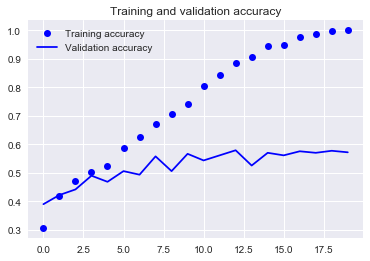

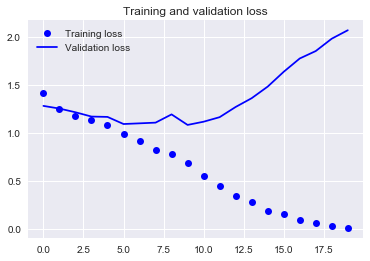

In [16]:
accuracy = ann_train.history['acc']
val_accuracy = ann_train.history['val_acc']
loss = ann_train.history['loss']
val_loss = ann_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [17]:
ann_model.save("ANN_model.h5py")

#### Trying out another combination and therefore trying dropout

In [18]:
batch_size = 34
epochs = 25
num_classes = 4
ann_model2 = Sequential()
ann_model2.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(65,65,3)))
ann_model2.add(LeakyReLU(alpha=0.1))
ann_model2.add(MaxPooling2D((2, 2),padding='same'))
ann_model2.add(Dropout(0.25))
ann_model2.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
ann_model2.add(LeakyReLU(alpha=0.1))
ann_model2.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
ann_model2.add(Dropout(0.25))
ann_model2.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
ann_model2.add(LeakyReLU(alpha=0.1))                  
ann_model2.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
ann_model2.add(Dropout(0.4))
ann_model2.add(Flatten())
ann_model2.add(Dense(128, activation='linear'))
ann_model2.add(LeakyReLU(alpha=0.1))           
ann_model2.add(Dropout(0.3))
ann_model2.add(Dense(num_classes, activation='softmax'))
ann_model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 65, 65, 32)        896       
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 65, 65, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 33, 33, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 33, 33, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 33, 33, 64)        18496     
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 33, 33, 64)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 64)        0         
__________

In [19]:
ann_model2.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [20]:
ann2_train_dropout = ann_model2.fit(x_train, train_Y_one_hot, batch_size=batch_size,epochs=epochs,verbose=1,
                                    validation_data=(x_val, val_Y_one_hot))

Train on 2239 samples, validate on 560 samples
Epoch 1/25
2239/2239 [==============================] - 37s 16ms/step - loss: 1.3905 - acc: 0.3028 - val_loss: 1.3124 - val_acc: 0.3679
Epoch 2/25
2239/2239 [==============================] - 35s 15ms/step - loss: 1.2567 - acc: 0.4198 - val_loss: 1.2247 - val_acc: 0.4179
Epoch 3/25
2239/2239 [==============================] - 35s 15ms/step - loss: 1.1978 - acc: 0.4667 - val_loss: 1.2225 - val_acc: 0.4339
Epoch 4/25
2239/2239 [==============================] - 34s 15ms/step - loss: 1.1755 - acc: 0.4725 - val_loss: 1.1771 - val_acc: 0.4518
Epoch 5/25
2239/2239 [==============================] - 35s 15ms/step - loss: 1.1124 - acc: 0.5181 - val_loss: 1.1351 - val_acc: 0.4929
Epoch 6/25
2239/2239 [==============================] - 34s 15ms/step - loss: 1.0736 - acc: 0.5520 - val_loss: 1.1225 - val_acc: 0.5339
Epoch 7/25
2239/2239 [==============================] - 34s 15ms/step - loss: 0.9728 - acc: 0.5909 - val_loss: 1.0989 - val_acc: 0.5536
E

In [21]:
ann_model2.save("ANN_model_dropout.h5py")

In [22]:
test_eval = ann_model2.evaluate(x_test, test_Y_one_hot, verbose=1)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

1200/1200 [==============================] - 5s 4ms/step
Test loss: 1.628919048309326
Test accuracy: 0.6083333333333333


#### looks like dropout technique added no value to our accuracy and we are still at an accuracy of 60%

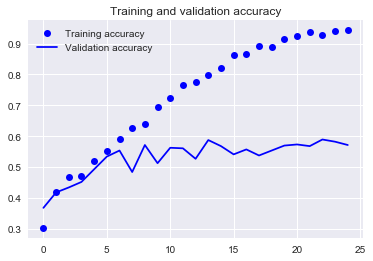

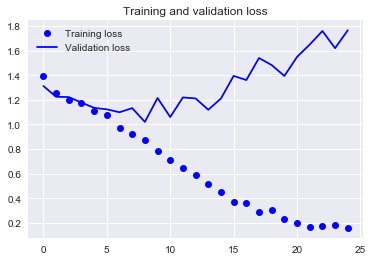

In [23]:
accuracy = ann2_train_dropout.history['acc']
val_accuracy = ann2_train_dropout.history['val_acc']
loss = ann2_train_dropout.history['loss']
val_loss = ann2_train_dropout.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [25]:
predicted_classes = ann_model2.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
correct = np.where(predicted_classes==y_test)[0]
print( "Found %d correct labels" % len(correct))

Found 727 correct labels


In [26]:
incorrect = np.where(predicted_classes!=y_test)[0]
print ("Found %d incorrect labels" % len(incorrect))

Found 473 incorrect labels


In [27]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_test, predicted_classes, target_names=target_names))

             precision    recall  f1-score   support

    Class 0       0.60      0.70      0.65       314
    Class 1       0.70      0.65      0.67       304
    Class 2       0.58      0.52      0.55       296
    Class 3       0.54      0.54      0.54       286

avg / total       0.61      0.61      0.60      1200



#### Histogram of gradients
* Here we will reload the data and squeeze it into our deired size
* Next we will convert all our images into from color to grayscale
* Finally we will run a svm model to check if the highlighter features of pasta say something more about it

##### Trying HOG 

In [31]:
import cv2
from skimage.feature import hog
start_time = time.time()
print("=================== Transforming images to Matrices ===================")
import matplotlib.image as img

target_w = 65
target_h = 65
all_imgs = []
all_labels = []
idx = 0    
min_side = 400
resize_count = 0

for img_name in all_ragu:
    img_arr = img.imread(os.path.join(root_dir, ragu_dir, img_name))
    train_image = cv2.cvtColor(img_arr, cv2.COLOR_BGR2GRAY)
    train_image = cv2.resize(train_image, (65, 65), interpolation=cv2.INTER_AREA)
    features = hog(train_image, orientations=9, pixels_per_cell=(8, 8))
    img_arr_rs = features
    all_imgs.append(img_arr_rs)
    all_labels.append(0)
print("=================== Raggu Loaded ===================")

for img_name in all_carbonara:
    img_arr = img.imread(os.path.join(root_dir, carbonara_dir, img_name))
    train_image = cv2.cvtColor(img_arr, cv2.COLOR_BGR2GRAY)
    train_image = cv2.resize(train_image, (65, 65), interpolation=cv2.INTER_AREA)
    features = hog(train_image, orientations=9, pixels_per_cell=(8, 8))
    img_arr_rs = features
    all_imgs.append(img_arr_rs)
    all_labels.append(1)
print("=================== Carbonara Loaded ===================")

for img_name in all_lasagna:
    img_arr = img.imread(os.path.join(root_dir, lasagna_dir, img_name))
    train_image = cv2.cvtColor(img_arr, cv2.COLOR_BGR2GRAY)
    train_image = cv2.resize(train_image, (65, 65), interpolation=cv2.INTER_AREA)
    features = hog(train_image, orientations=9, pixels_per_cell=(8, 8))
    img_arr_rs = features
    all_imgs.append(img_arr_rs)
    all_labels.append(2)
print("=================== Lasagna Loaded ===================")

for img_name in all_gnocchi:
    img_arr = img.imread(os.path.join(root_dir,gnocchi_dir, img_name))
    train_image = cv2.cvtColor(img_arr, cv2.COLOR_BGR2GRAY)
    train_image = cv2.resize(train_image, (65, 65), interpolation=cv2.INTER_AREA)
    features = hog(train_image, orientations=9, pixels_per_cell=(8, 8))
    img_arr_rs = features
    all_imgs.append(img_arr_rs)
    all_labels.append(3)
print("=================== Gnnochi Loaded ===================")
print("Duration: --- %s Minutes ---" % ((time.time() - start_time)/60))

=================== Transforming images to Matrices ===================
=================== Raggu Loaded ===================
=================== Carbonara Loaded ===================
=================== Lasagna Loaded ===================
=================== Gnnochi Loaded ===================
Duration: --- 1.4429159879684448 Minutes ---


In [41]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical


X = np.array(all_imgs)
Y = np.array(all_labels)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [42]:
from sklearn import svm
C_default = 1
clf = svm.SVC(kernel='linear', C=C_default)
clf.fit(X_train, Y_train)

train_accuracy_svm = clf.score(X_train,Y_train)
print(train_accuracy_svm)
test_accuracy_svm = clf.score(X_test,Y_test)
print(test_accuracy_svm)

0.5267271022194435
0.3925


In [43]:
model=svm.SVC(kernel='rbf', C=1)

In [44]:
model.fit(X_train,Y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [45]:
model.score(X_test,Y_test)

0.23125

In [46]:
start_time = time.time()

pred=model.predict(X_test)
cm_df = pd.DataFrame(confusion_matrix(Y_test, pred).T, index=model.classes_,
                     columns=model.classes_)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
print(cm_df)
print(classification_report(Y_test, pred))
print(model.score(X_test,Y_test))

print("Duration: --- %s Minutes ---" % ((time.time() - start_time)/60))

True         0    1    2    3
Predicted                    
0            0    0    0    0
1            0    0    0    0
2            0    0    0    0
3          208  207  200  185
             precision    recall  f1-score   support

          0       0.00      0.00      0.00       208
          1       0.00      0.00      0.00       207
          2       0.00      0.00      0.00       200
          3       0.23      1.00      0.38       185

avg / total       0.05      0.23      0.09       800

0.23125
Duration: --- 0.4905932664871216 Minutes ---


#### looks like HOG transformed data produced even worst results

# Conclusion

@ Author Mohammed Topiwalla
* Date 15/03/2018
* *Machine learning exam submission*
* *Student ID-> 0000854104*

#### Ok so we ran in total a few combinations of svm and neural networks for classification.

| Model Name | Accuaracy |
| ------------ | ---------------- | 
| SVM with Gausian kernel and c=1 |	48% |	
| SVM with Gausian kernel and c=1,gamma=10 | 25% |	
| SVM with sigmoid kernel and c=1,gamma=0.1  | 30% |	
| SVM with Polynomial kernel | 27% |	
| Convolution ANN 4 hidden layers | 60% |
| Convolution ANN 4 hidden layers and droput allowed | 60% |
| SVM on HOG transformed data | 23% |

#### It is pretty evident on the clear winner when it comes to image classification for lasagna here

##### What did I learn
* Image classification (Was very keen on taking it up)
* Running various svm's and how to play around with their hyper parameters especially impact and use of C
* Creating neural networks simple to difficult

Decleration:
  - I have not used the support codes provided in the tutorial
  - Whatever is done here is soely a combination of code provided by the professor during the class and some excellent code I found on stackoverflow.com and datacamp.com via adhoc google searches.
  - The work in this jupyter notebook has been done by me
  - To find the fault image i put a for loop to read the image while printing out the image name before it is exported, this way i knew the faulty image as it threw an exception while being read.
  - The entire notebook is in python 3 and all packages used are installs via pip!

Install the dependencies and devDependencies and start the server.

```sh
$ pip install opencv-python
$ pip install imutils
# To migrate a python2 script to python3
$ 2to3
```